In [1]:
import os 
os.chdir(r'Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp\src')

from neurochat.nc_data import NData
from neurochat.nc_spike import NSpike
from neurochat.nc_spatial import NSpatial
import neurochat.nc_plot as nc_plot
from neurochat.nc_lfp import NLfp
import matplotlib.pyplot as plt
import numpy as np
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
import numpy as np
import math
import pynapple as nap
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

import sys
import nwb4fp.analyses.maps as mapp
from nwb4fp.analyses.examples.tracking_plot import plot_ratemap,plot_path
from nwb4fp.analyses.fields import separate_fields_by_laplace, separate_fields_by_dilation,find_peaks,separate_fields_by_laplace_of_gaussian,calculate_field_centers,distance_to_edge_function, remove_fields_by_area, map_pass_to_unit_circle,which_field,compute_crossings
from elephant.statistics import time_histogram, instantaneous_rate
from nwb4fp.analyses import maps
from nwb4fp.analyses.data import pos2speed,speed_filtered_spikes,load_speed_fromNWB,load_units_fromNWB,get_filed_num,unit_location_ch
from scipy.ndimage import gaussian_filter
import ast
import pandas as pd
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd


Q:\sachuriga\Sachuriga_Python\quattrocolo-nwb4fp\src\nwb4fp\analyses\examples\tracking_plot.py:5: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.measurements import center_of_mass


In [2]:
import pandas as pd
df_loaded = pd.read_pickle(r'Q:/sachuriga/CR_CA1_paper/tables/all_units_table.pkl')
len(df_loaded)
df_good = df_loaded[df_loaded['unit_quality']=="good"]

In [4]:
df_good.head()

spike_times unit_name  sd_ratio  \
0  [53.421866666666666, 54.1465, 61.9342333333333...        41  1.665216   
1  [52.239733333333334, 52.245, 52.2489, 53.17986...        47  2.558734   
2  [49.5235, 49.52916666666667, 49.5744, 49.58223...        60  1.512081   
3  [49.632333333333335, 49.638466666666666, 49.65...         1  1.594608   
5  [49.5356, 49.56426666666667, 49.57673333333334...         4  0.978401   

   sync_spike_8.1  presence_ratio  cluster_id.30  half_width     l_ratio.1  \
0             0.0         0.97561            0.0    0.000103  4.376648e-05   
1             0.0         1.00000            1.0    0.000143  9.769963e-18   
2             0.0         1.00000            2.0    0.000123  0.000000e+00   
3             0.0         1.00000            3.0    0.000210  2.043745e-03   
5             0.0         1.00000            5.0    0.000133  1.016816e-02   

   recovery_slope.1  cluster_id.19  ... animal_id  \
0    -208751.824563            0.0  ...     66922   
1    -180256.638141            1.0  ...     66922   
2    -150731.936891            2.0  ...     66922   
3     -49075.422890            3.0  ...     66922   
5     -89132.779959            5.0  ...     66922   

                                     session_id                 cell_type  \
0  66922_2024-09-25_15-39-48_A_phy_k_manual.nwb           Pyramidal cells   
1  66922_2024-09-25_15-39-48_A_phy_k_manual.nwb           Pyramidal cells   
2  66922_2024-09-25_15-39-48_A_phy_k_manual.nwb  Narrow spike interneuron   
3  66922_2024-09-25_15-39-48_A_phy_k_manual.nwb   Wide Spike Interneurons   
5  66922_2024-09-25_15-39-48_A_phy_k_manual.nwb  Narrow spike interneuron   

   functional_cell_type                    genotype              experimenter  \
0            Place cell  NDNF-flp +/- and Pde1c +/-  Ingvild Lynneberg Glærum   
1             normal_py  NDNF-flp +/- and Pde1c +/-  Ingvild Lynneberg Glærum   
2            Speed cell  NDNF-flp +/- and Pde1c +/-  Ingvild Lynneberg Glærum   
3            Speed cell  NDNF-flp +/- and Pde1c +/-  Ingvild Lynneberg Glærum   
5            Speed cell  NDNF-flp +/- and Pde1c +/-  Ingvild Lynneberg Glærum   

   sex  cell_type_group_6_group  cell_type_group_2_group  session  
0    F                        1                        1        A  
1    F                        1                        1        A  
2    F                        3                        3        A  
3    F                        5                        3        A  
5    F                        3                        3        A  

[5 rows x 134 columns]


Comparison for l_ratio:
Control mean: 0.01 ± 0.00
Experimental mean: 0.01 ± 0.00
Mann-Whitney U statistic: 64708.00, p-value: 0.0813

Comparison for isi_violations_ratio:
Control mean: 0.03 ± 0.00
Experimental mean: 0.02 ± 0.00
Mann-Whitney U statistic: 57697.00, p-value: 0.3157

Comparison for amplitude_cutoff:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 45007.00, p-value: 0.5024

Comparison for snr:
Control mean: 14.07 ± 0.47
Experimental mean: 14.07 ± 0.42
Mann-Whitney U statistic: 57877.00, p-value: 0.3999


C:\Users\sachur\AppData\Local\Temp\ipykernel_11948\2636114312.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_11948\2636114312.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_11948\2636114312.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_11948\2636114312.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

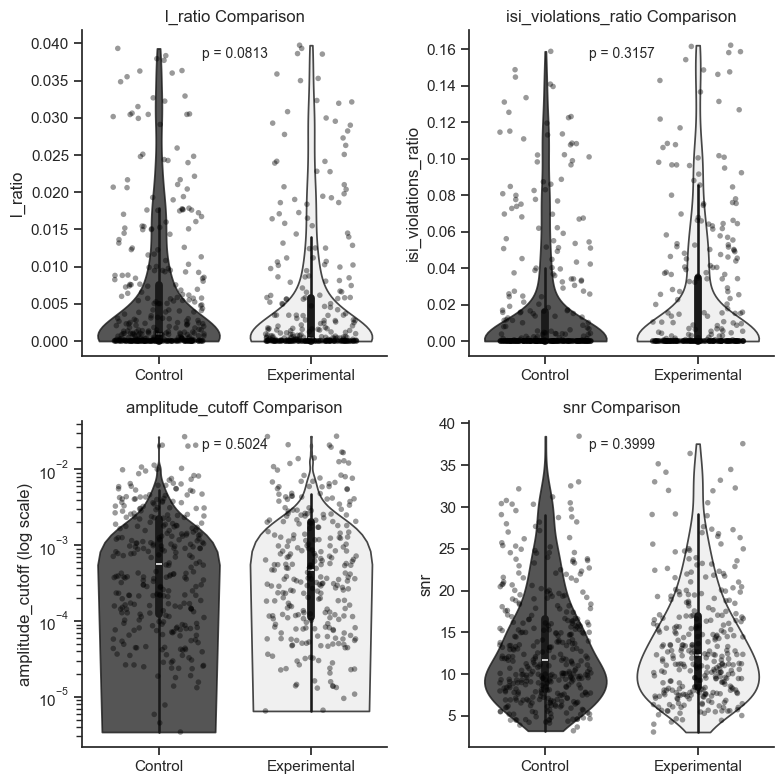


Comparison for l_ratio:
Control mean: 0.01 ± 0.00
Experimental mean: 0.01 ± 0.00
Mann-Whitney U statistic: 29917.50, p-value: 0.9418

Comparison for isi_violations_ratio:
Control mean: 0.03 ± 0.00
Experimental mean: 0.03 ± 0.00
Mann-Whitney U statistic: 28906.00, p-value: 0.4267

Comparison for amplitude_cutoff:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 22085.00, p-value: 0.3025

Comparison for snr:
Control mean: 14.04 ± 0.55
Experimental mean: 15.18 ± 0.57
Mann-Whitney U statistic: 28362.00, p-value: 0.2891


C:\Users\sachur\AppData\Local\Temp\ipykernel_11948\2636114312.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_11948\2636114312.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_11948\2636114312.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_11948\2636114312.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

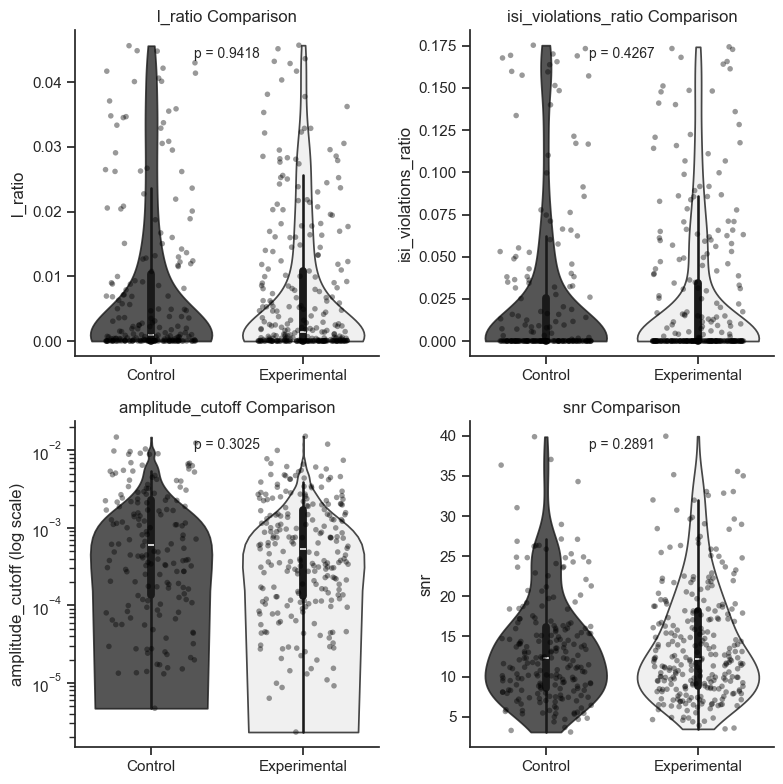


Comparison for l_ratio:
Control mean: 0.01 ± 0.00
Experimental mean: 0.01 ± 0.00
Mann-Whitney U statistic: 23376.00, p-value: 0.4547

Comparison for isi_violations_ratio:
Control mean: 0.02 ± 0.00
Experimental mean: 0.03 ± 0.00
Mann-Whitney U statistic: 23308.00, p-value: 0.3781

Comparison for amplitude_cutoff:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 16017.00, p-value: 0.6158

Comparison for snr:
Control mean: 14.65 ± 0.59
Experimental mean: 15.08 ± 0.58
Mann-Whitney U statistic: 24315.00, p-value: 0.9595


C:\Users\sachur\AppData\Local\Temp\ipykernel_11948\2636114312.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_11948\2636114312.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_11948\2636114312.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_11948\2636114312.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

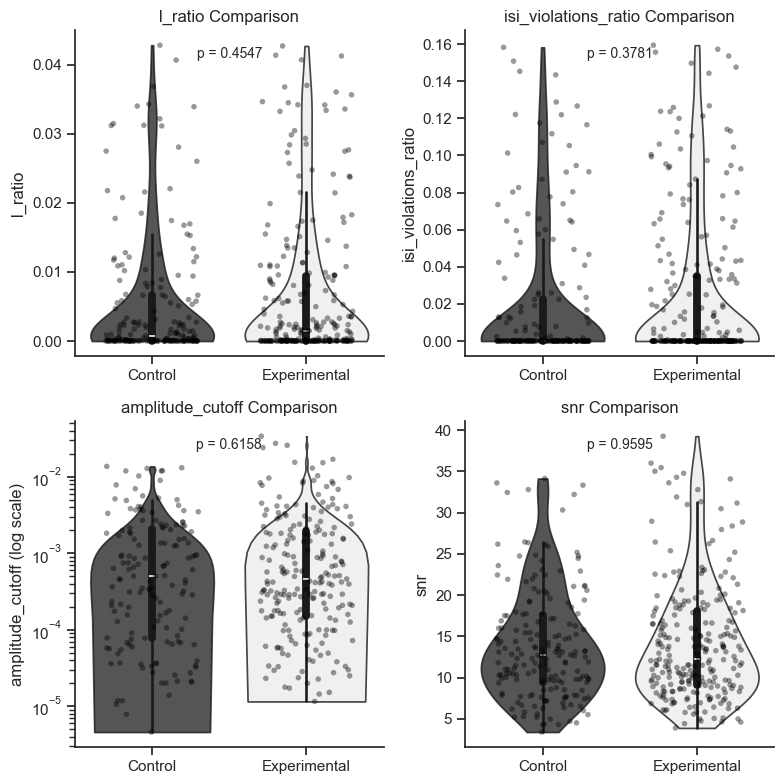


Comparison for l_ratio:
Control mean: 0.01 ± 0.00
Experimental mean: 0.01 ± 0.00
Mann-Whitney U statistic: 338599.50, p-value: 0.6558

Comparison for isi_violations_ratio:
Control mean: 0.03 ± 0.00
Experimental mean: 0.03 ± 0.00
Mann-Whitney U statistic: 320942.50, p-value: 0.1210

Comparison for amplitude_cutoff:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 239385.00, p-value: 0.4979

Comparison for snr:
Control mean: 14.20 ± 0.31
Experimental mean: 14.74 ± 0.30
Mann-Whitney U statistic: 321571.00, p-value: 0.1814


C:\Users\sachur\AppData\Local\Temp\ipykernel_11948\2636114312.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_11948\2636114312.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_11948\2636114312.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_11948\2636114312.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

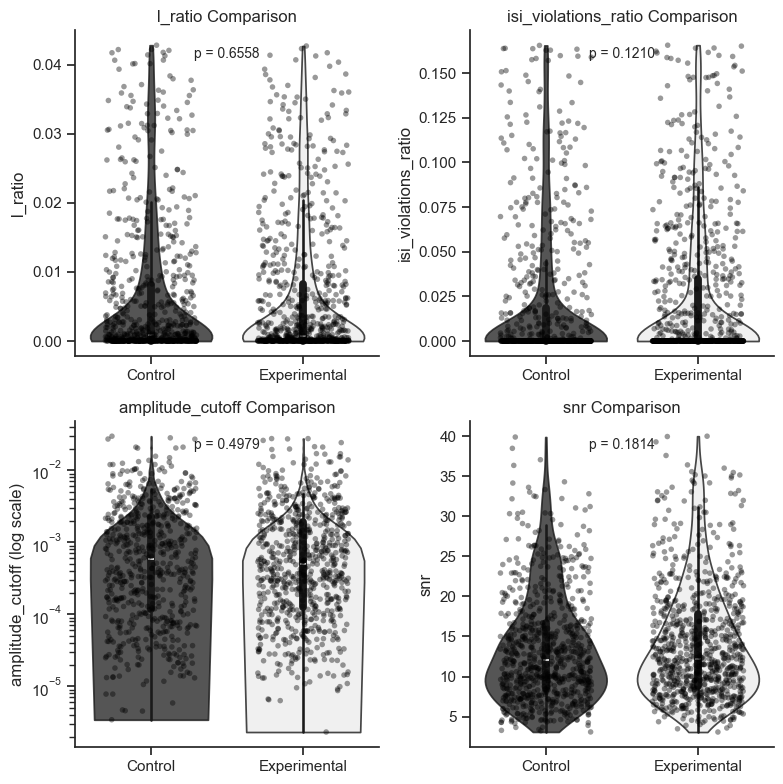

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

df = df_good

base_folder = r"Q:/sachuriga/CR_CA1_paper/Results/Cluster"

control_ids = ['65165', '65091', '63383', '66539', '65622']
exp_ids = ['65588', '63385', '66538', '66537', '66922']


session = ["A","B","C","Total"]

for session in session:
    # Filter for 'A' sessions
    if session == "Total":
        df_a = df
    else:
        df_a = df[df['session'] == session]

    # Separate into control and experimental groups
    control_df = df_a[df_a['animal_id'].isin(control_ids)]
    exp_df = df_a[df_a['animal_id'].isin(exp_ids)]

    # Set Seaborn theme
    sns.set_theme(style="ticks")

    # Statistical comparisons for scalar metrics
    metrics = ['l_ratio', 'isi_violations_ratio', 
            'amplitude_cutoff', 'snr']

    # Create figure with 3x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

    # Define custom colors
    control_color = sns.color_palette("Greys")[-1]  # Dark blue for Control
    exp_color = sns.color_palette("Greys")[0]       # Light blue for Experimental

    for idx, metric in enumerate(metrics):
        control_values = control_df[metric].dropna()
        exp_values = exp_df[metric].dropna()
        
        if len(control_values) > 0 and len(exp_values) > 0:
            control_mean = control_values.mean()
            exp_mean = exp_values.mean()
            control_sem = control_values.sem()
            exp_sem = exp_values.sem()
            
            print(f"\nComparison for {metric}:")
            print(f"Control mean: {control_mean:.2f} ± {control_sem:.2f}")
            print(f"Experimental mean: {exp_mean:.2f} ± {exp_sem:.2f}")
            
            # Mann-Whitney U test
            u_stat, p_val = stats.mannwhitneyu(control_values, exp_values, alternative='two-sided')
            print(f"Mann-Whitney U statistic: {u_stat:.2f}, p-value: {p_val:.4f}")
            
            # Prepare data for Seaborn plotting
            plot_df = pd.DataFrame({
                'value': pd.concat([control_values, exp_values]),
                'group': ['Control'] * len(control_values) + ['Experimental'] * len(exp_values)
            })
            
            # Check if deviation is "too large" (using coefficient of variation > 1 as threshold)
            all_values = plot_df['value']
            cv = all_values.std() / all_values.mean()  # Coefficient of variation
            use_log_scale = cv > 1 and all_values.min() > 0  # Ensure positive values for log scale
            
            # Filter out outliers (e.g., beyond 3 standard deviations)
            mean_val = all_values.mean()
            std_val = all_values.std()
            plot_df_filtered = plot_df[(plot_df['value'] >= mean_val - 3 * std_val) & 
                                    (plot_df['value'] <= mean_val + 3 * std_val)]
            
            # Create violin plot on the specific subplot
            violin = sns.violinplot(
                data=plot_df_filtered,
                x='group',
                y='value',
                ax=axes[idx],
                palette={"Control": control_color, "Experimental": exp_color},
                width=0.8,
                cut=0  # Prevents violin tails from extending beyond data range
            )
            
            # Set alpha (transparency) for the violin plot
            for patch in violin.collections:
                patch.set_alpha(0.8)
            
            # Add individual points with matching colors
            sns.stripplot(
                data=plot_df_filtered,
                x='group',
                y='value',
                ax=axes[idx],
                size=4,
                hue='group',
                palette={"Control": "black", "Experimental": "black"},
                alpha=0.4,
                jitter=0.3,
                legend=False
            )
            
            # Set title and labels
            axes[idx].set_title(f'{metric} Comparison')
            axes[idx].set_ylabel(metric)
            axes[idx].set_xlabel('Group')
            axes[idx].yaxis.grid(False)
            axes[idx].set(xlabel="")
            
            # Apply log scale if deviation is too large
            if use_log_scale:
                axes[idx].set_yscale('log')
                axes[idx].set_ylabel(f'{metric} (log scale)')
            
            # Add p-value at the top of the plot
            axes[idx].text(0.5, 0.95, f'p = {p_val:.4f}', 
                        horizontalalignment='center', 
                        verticalalignment='top', 
                        transform=axes[idx].transAxes, 
                        fontsize=10)
            
            # Remove top and right spines, keep bottom (x) and left (y) axes
            axes[idx].spines['top'].set_visible(False)
            axes[idx].spines['right'].set_visible(False)
            axes[idx].spines['bottom'].set_visible(True)
            axes[idx].spines['left'].set_visible(True)

    # Save the figure
    fig.savefig(fr'{base_folder}/{session}_cluster_quality.eps', format='eps', bbox_inches='tight')
    fig.savefig(fr'{base_folder}/{session}_cluster_quality.png', format='png', bbox_inches='tight')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()